<div align="center">
<h1 style="color:#1565c0; font-size:2.8em; font-weight:bold; margin-bottom:0.2em; margin-top:0.5em;">Практична робота №5</h1>
<h3 style="color:#1976d2; margin-top:0; font-weight:normal;">Побудова та оцiнювання
ансамблiв моделей класифiкацiї та регресiї з
використанням бiблiотеки Scikit-Learn Python<b>Scikit-Learn Python</b></h3>
<br>
<br>
<b>Варіант 12</b><br>
<b>Автори:</b><br>
Плахтій Злата, КА-32<br>
Пастушенко Максим, КА-33<br>
Романов Фелікс, КА-33
</div>

<b>1. Початковi 2D-данi представити графiчно.</b><br><br>

<b>2. Розбити данi на навчальний, перевiрочний та тестовий набори.</b>
<div>
    Перевiрочний набiр використати для налаштування гiперпараметрiв. 
    Тестовий набiр використати для остаточної оцiнки якостi моделей.
</div>

<b>3. Побудувати ансамблi моделей, використовуючи наступнi методи (згiдно з варiантом):</b>
<ul>
    <li><b>AdaBoostClassifier.</b> Розглянути рiзнi значення n_estimators, learning_rate та algorithm.</li>
    <li><b>AdaBoostRegressor.</b> Розглянути рiзнi значення n_estimators, learning_rate та loss.</li>
    <li><b>GradientBoostingClassifier.</b> Розглянути рiзнi значення learning_rate, n_estimators, subsample, max_depth та max_features.<br>
    <i>Перевiрити гiпотезу, що max_leaf_nodes = k дає результати порiвнянi з max_depth = k-1, але значно швидше тренується.</i></li>
    <li><b>GradientBoostingRegressor.</b> Розглянути рiзнi значення loss, learning_rate, n_estimators, subsample, max_depth, max_features.</li>
    <li><b>BaggingClassifier.</b> Розглянути рiзнi значення max_samples, bootstrap, n_estimators.</li>
    <li><b>BaggingRegressor.</b> Розглянути рiзнi значення max_samples, bootstrap, n_estimators.</li>
    <li><b>RandomForestClassifier.</b> Розглянути рiзнi значення параметрiв max_depth та max_features, bootstrap, n_estimators.</li>
    <li><b>RandomForestRegressor.</b> Розглянути рiзнi значення параметрiв max_depth, max_features, bootstrap, n_estimators.</li>
    <li><b>ExtraTreesClassifier.</b> Розглянути рiзнi значення параметрiв max_depth, max_features, min_samples_split.</li>
    <li><b>ExtraTreesRegressor.</b></li>
    <li><b>VotingClassifier.</b> Розглянути рiзнi значення voting та weights.</li>
    <li><b>VotingRegressor.</b> Розглянути рiзнi значення weights.</li>
    <li><b>StackingClassifier.</b> Розглянути рiзнi значення final_estimator, stack_method.</li>
    <li><b>StackingRegressor.</b> Розглянути рiзнi значення final_estimator.</li>
</ul>

<b>В ансамблях Bagging, RandomForest, ExtraTrees, AdaBoost, GradientBoosting:</b>
<ul>
    <li>В якостi <code>base_estimator</code> / <code>estimators</code> використати одну/ кiлька моделей iз параметрами по умовчанню: дерев рiшень, логiстичної регресiї, svm тощо.</li>
    <li>Побудувати графiки залежностi значень показника якостi ансамбля та iндивiдуальної моделi вiд <code>n_estimators</code> на однiй координатнiй вiсi. Такий графiк для iндивiдуальної моделi, очевидно, буде горизонтальною прямою.</li>
</ul>
<div>
    В задачах класифiкацiї в якостi показника якостi можна обрати <code>accuracy_score</code>, <code>f1_score</code> або <code>zero_one_loss</code>. <br>
    В задачах регресiї показником якостi можна обрати R2, MAPE або RMSE.
</div>
<ul>
    <li>Оцiнити якiсть ансамблю на основi прикладiв oob (для ансамблiв на основi беггiнгу).</li>
</ul>

<div>
    Для ансамблiв <b>Voting</b> та <b>Stacking</b> спробувати пiдiбрати значення гiперпараметрiв моделей - складових ансамбля.
</div>


<b>4. В задачах класифiкацiї навести приклад границi рiшень decision boundaries на основi окремої моделi та ансамблю.</b>
<div>
    Побудувати графiки на однiй координатнiй площинi (для регресiї):
    <ul>
        <li>прогнозiв на основi ансамблю,</li>
        <li>прогнозiв на основi окремої моделi base_estimator / estimators,</li>
        <li>точок даних з перевiрочної / тестової множин.</li>
    </ul>
</div>


<b>5. Розрахувати значення змiщення та дисперсiї для окремої моделi та ансамблю.</b><br>

<b>6. Що можна сказати про час навчання ансамблю порiвняно з окремими моделями, якi утворюють цi ансамблi?</b><br>

<b>7. Зробити висновки.</b> 
<div>Чи краще на заданих даних виконується ансамбль порiвняно з iндивiдуальними моделями?</div>

<b>ВАРІАНТ 12. StackingClassifier.</b> Розглянути рiзнi значення final_estimator та stack_method.<br>
<b>Початковi данi:</b><br>
(а) <code>sklearn.datasets.samples_generator.make_circles</code><br>
<code>X, y = make_circles(noise=0.2, factor=0.5, random_state=1)</code>

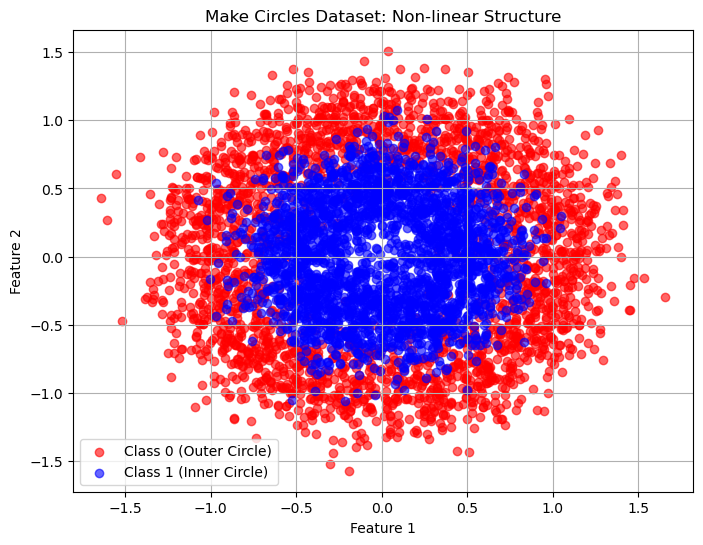

Загальна кількість: 5000
Train set shape: (3000, 2) (60%)
Validation set shape: (1000, 2) (20%)
Test set shape: (1000, 2) (20%)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# 1. Генерація даних
# Використовуємо параметри з вашого завдання
X, y = make_circles(n_samples=5000, noise=0.2, factor=0.5, random_state=1)

# 2. Візуалізація вхідних даних
plt.figure(figsize=(8, 6))
# Малюємо точки класу 0 (червоні) та класу 1 (сині)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0 (Outer Circle)', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1 (Inner Circle)', alpha=0.6)
plt.title("Make Circles Dataset: Non-linear Structure")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# 3. Розбиття даних (Train / Validation / Test) -> 60% / 20% / 20%

# Етап А: Відокремлюємо 60% на Train. Залишається 40% (temp) для Val+Test.
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Етап Б: Розбиваємо X_temp та y_temp (ті 40%, що залишилися) навпіл
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=42, 
    stratify=y_temp 
)

# Перевірка розмірностей
print(f"Загальна кількість: {X.shape[0]}")
print(f"Train set shape: {X_train.shape} ({X_train.shape[0]/X.shape[0]:.0%})")
print(f"Validation set shape: {X_val.shape} ({X_val.shape[0]/X.shape[0]:.0%})")
print(f"Test set shape: {X_test.shape} ({X_test.shape[0]/X.shape[0]:.0%})")

In [ ]:
# Copy this code into a new cell in your notebook

# Imports
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Models and Parameters
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']       }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Tuning
best_estimators = {}
best_params = {}

for name, config in models.items():
    print(f"Tuning {name}...")
    search = HalvingGridSearchCV(
        config['model'],
        config['params'],
        factor=3,
        cv=5,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    
    print(f"Best Parameters for {name}: {search.best_params_}")
    print(f"Best Score: {search.best_score_:.4f}")
    best_estimators[name] = search.best_estimator_
    best_params[name] = search.best_params_
    print("-" * 30)

Tuning LogisticRegression...
Best Parameters for LogisticRegression: {'C': 1, 'solver': 'lbfgs'}
Best Score: 0.5027
------------------------------
Tuning KNeighborsClassifier...
Best Parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.8835
------------------------------
Tuning DecisionTreeClassifier...
Best Parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Score: 0.8698
------------------------------
Tuning SVC...
Best Parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.8948
------------------------------
